<a href="https://colab.research.google.com/github/rodeledjan/Data_Science_and_Machine_Learning/blob/main/HousePrices_AdvancedRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Prices - Advanced Regression Techniques


##Initial Data Exploration

In [123]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [124]:
#download the data from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/discussion?sort=hotness
df=pd.read_csv('/content/train.csv', encoding='latin-1')
df.head()
# SalePrice
column_names = df.columns.tolist()
print(column_names)
column_total = len(df.columns)
print('column_total: ',column_total)
df['SalePrice'].describe()

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [125]:
#look for features that are numeric that we can use for correlation
numeric_cols = df.select_dtypes(include=['int', 'float'])
print(numeric_cols)
numberic_column_names = numeric_cols.columns.tolist()
print(numberic_column_names)
print(numeric_cols)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

##Exploring specific variables by using plots

###Skewness and Kurtosis
Skewness: 1.882876, Kurtosis: 6.536282

In [126]:
kurtosis = df['SalePrice'].kurt()
skewness = df['SalePrice'].skew()
print("Skewness: %f" %skewness)
print("Kurtosis: %f" %kurtosis)

Skewness: 1.882876
Kurtosis: 6.536282


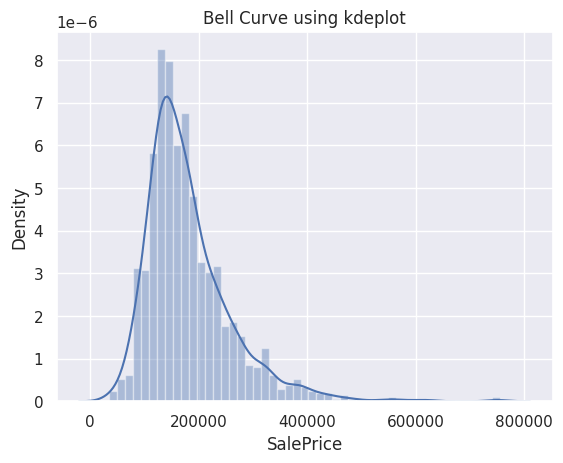

In [127]:

sns.distplot( df['SalePrice'] )
plt.title('Bell Curve using kdeplot')
plt.show()

###Scatter Plots

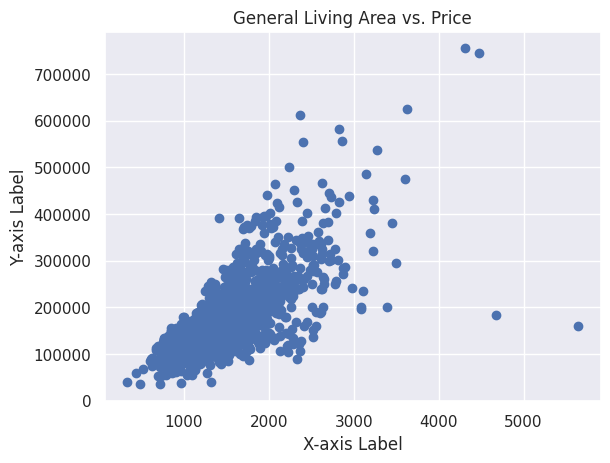

In [128]:
#Scatter Plot for Greater Living Area
x = df['GrLivArea']
y = df['SalePrice']

# Create the scatter plot
plt.scatter(x, y)
# Add labels and title (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("General Living Area vs. Price")
# Display the plot
plt.show()

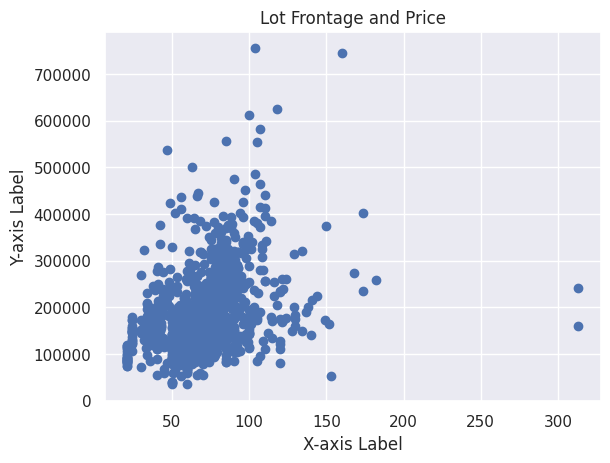

In [129]:
#Scatter Plot for LotFrontage and Price
x = df['LotFrontage']
y = df['SalePrice']

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Lot Frontage and Price")

# Display the plot
plt.show()

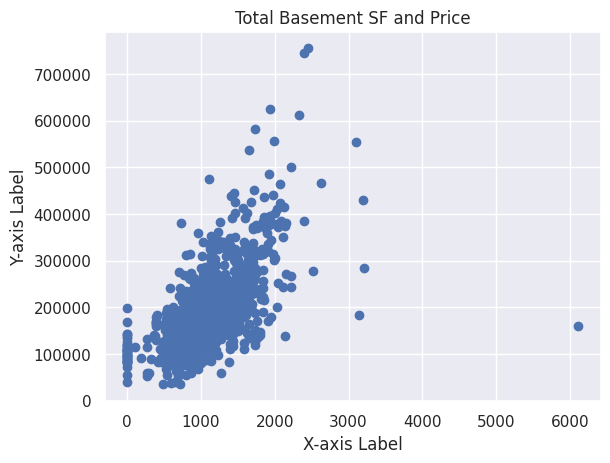

In [130]:
#Scatter Plot for Total Basement SF and Price
x = df['TotalBsmtSF']
y = df['SalePrice']

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Total Basement SF and Price")

# Display the plot
plt.show()

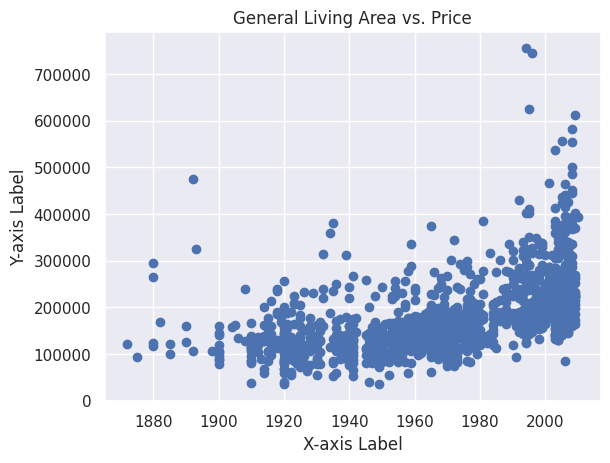

In [131]:
#Scatter Plot for Greater Living Area
x = df['YearBuilt']
y = df['SalePrice']

# Create the scatter plot
plt.scatter(x, y)
# Add labels and title (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("General Living Area vs. Price")
# Display the plot
plt.show()

##Box Plots

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

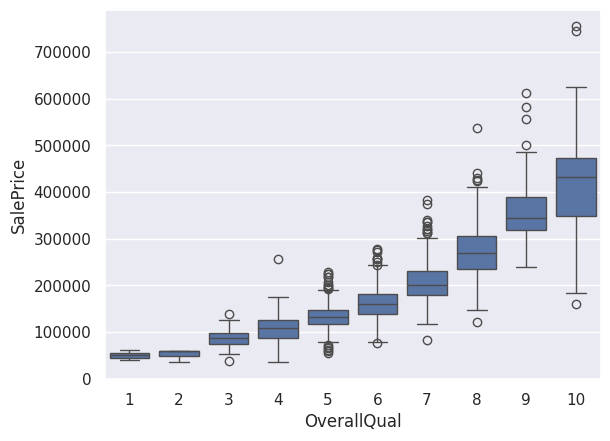

In [132]:

sns.boxplot(data=df, x="OverallQual", y="SalePrice")

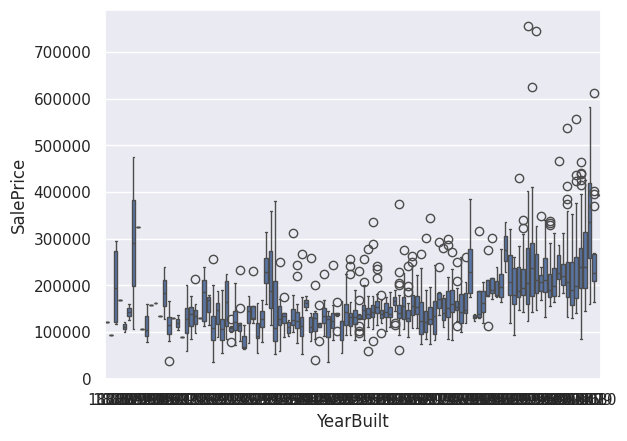

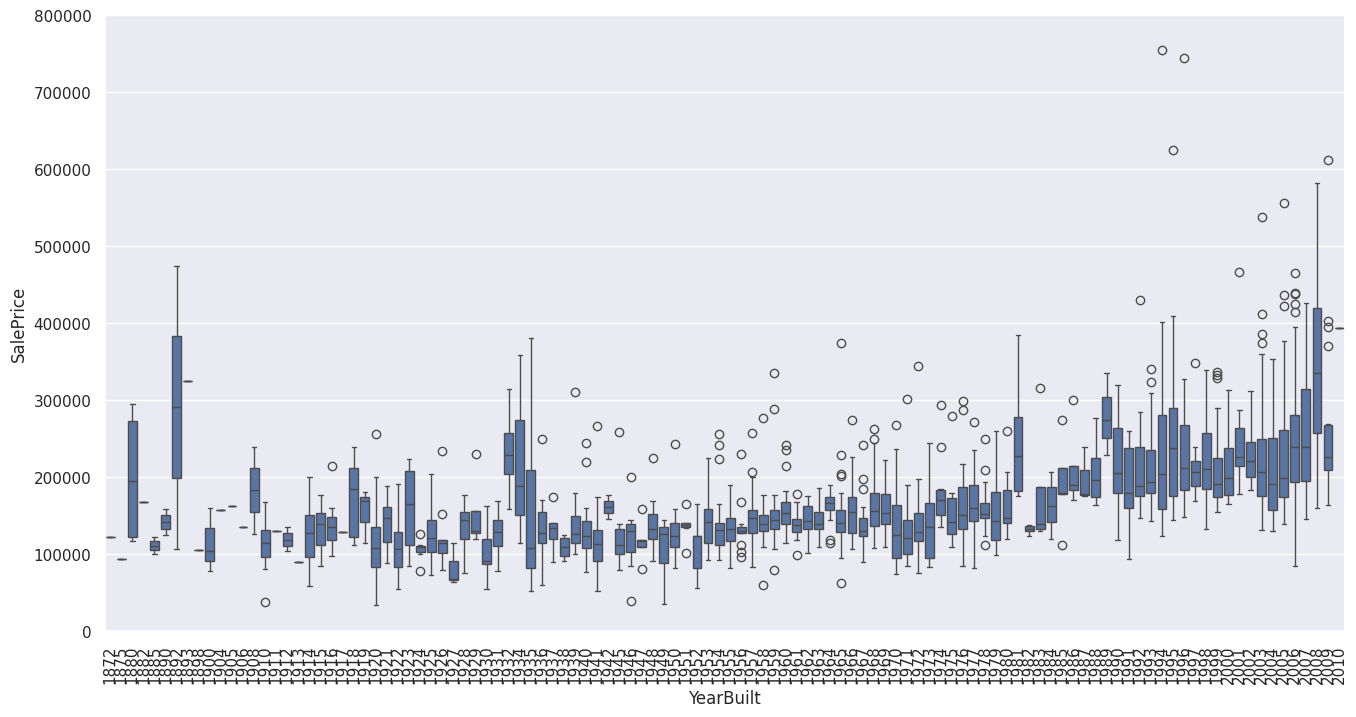

In [133]:
sns.boxplot(data=df, x="YearBuilt", y="SalePrice")
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

##Heat Maps and Pair Plot

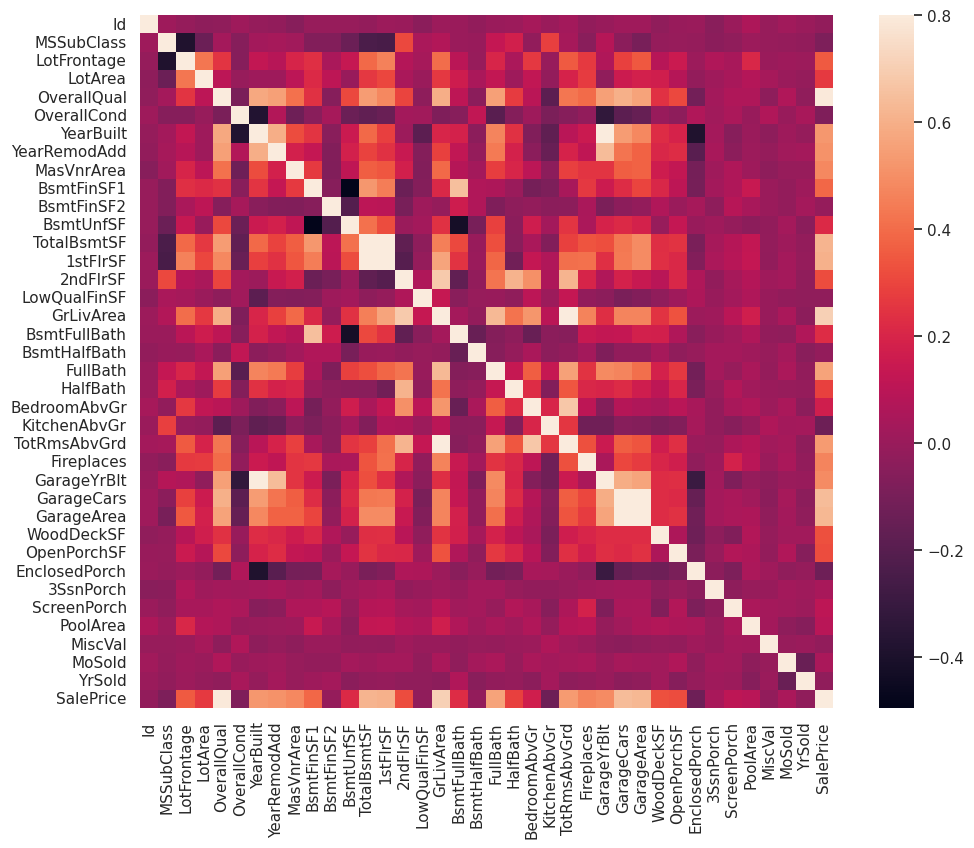

In [134]:

corrmat = numeric_cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


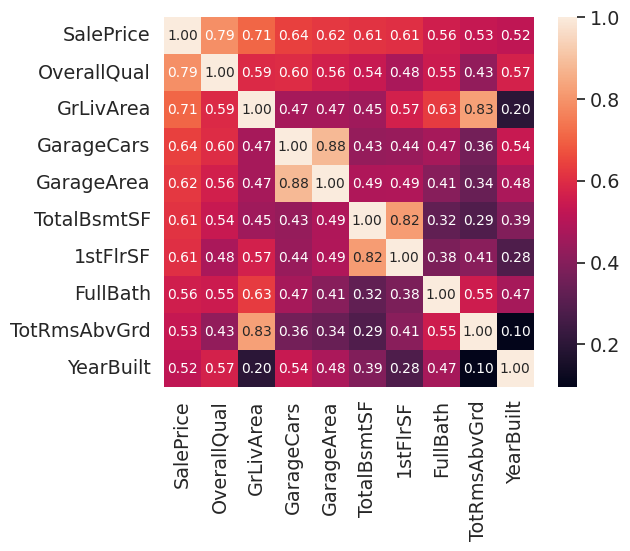

In [135]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(numeric_cols[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

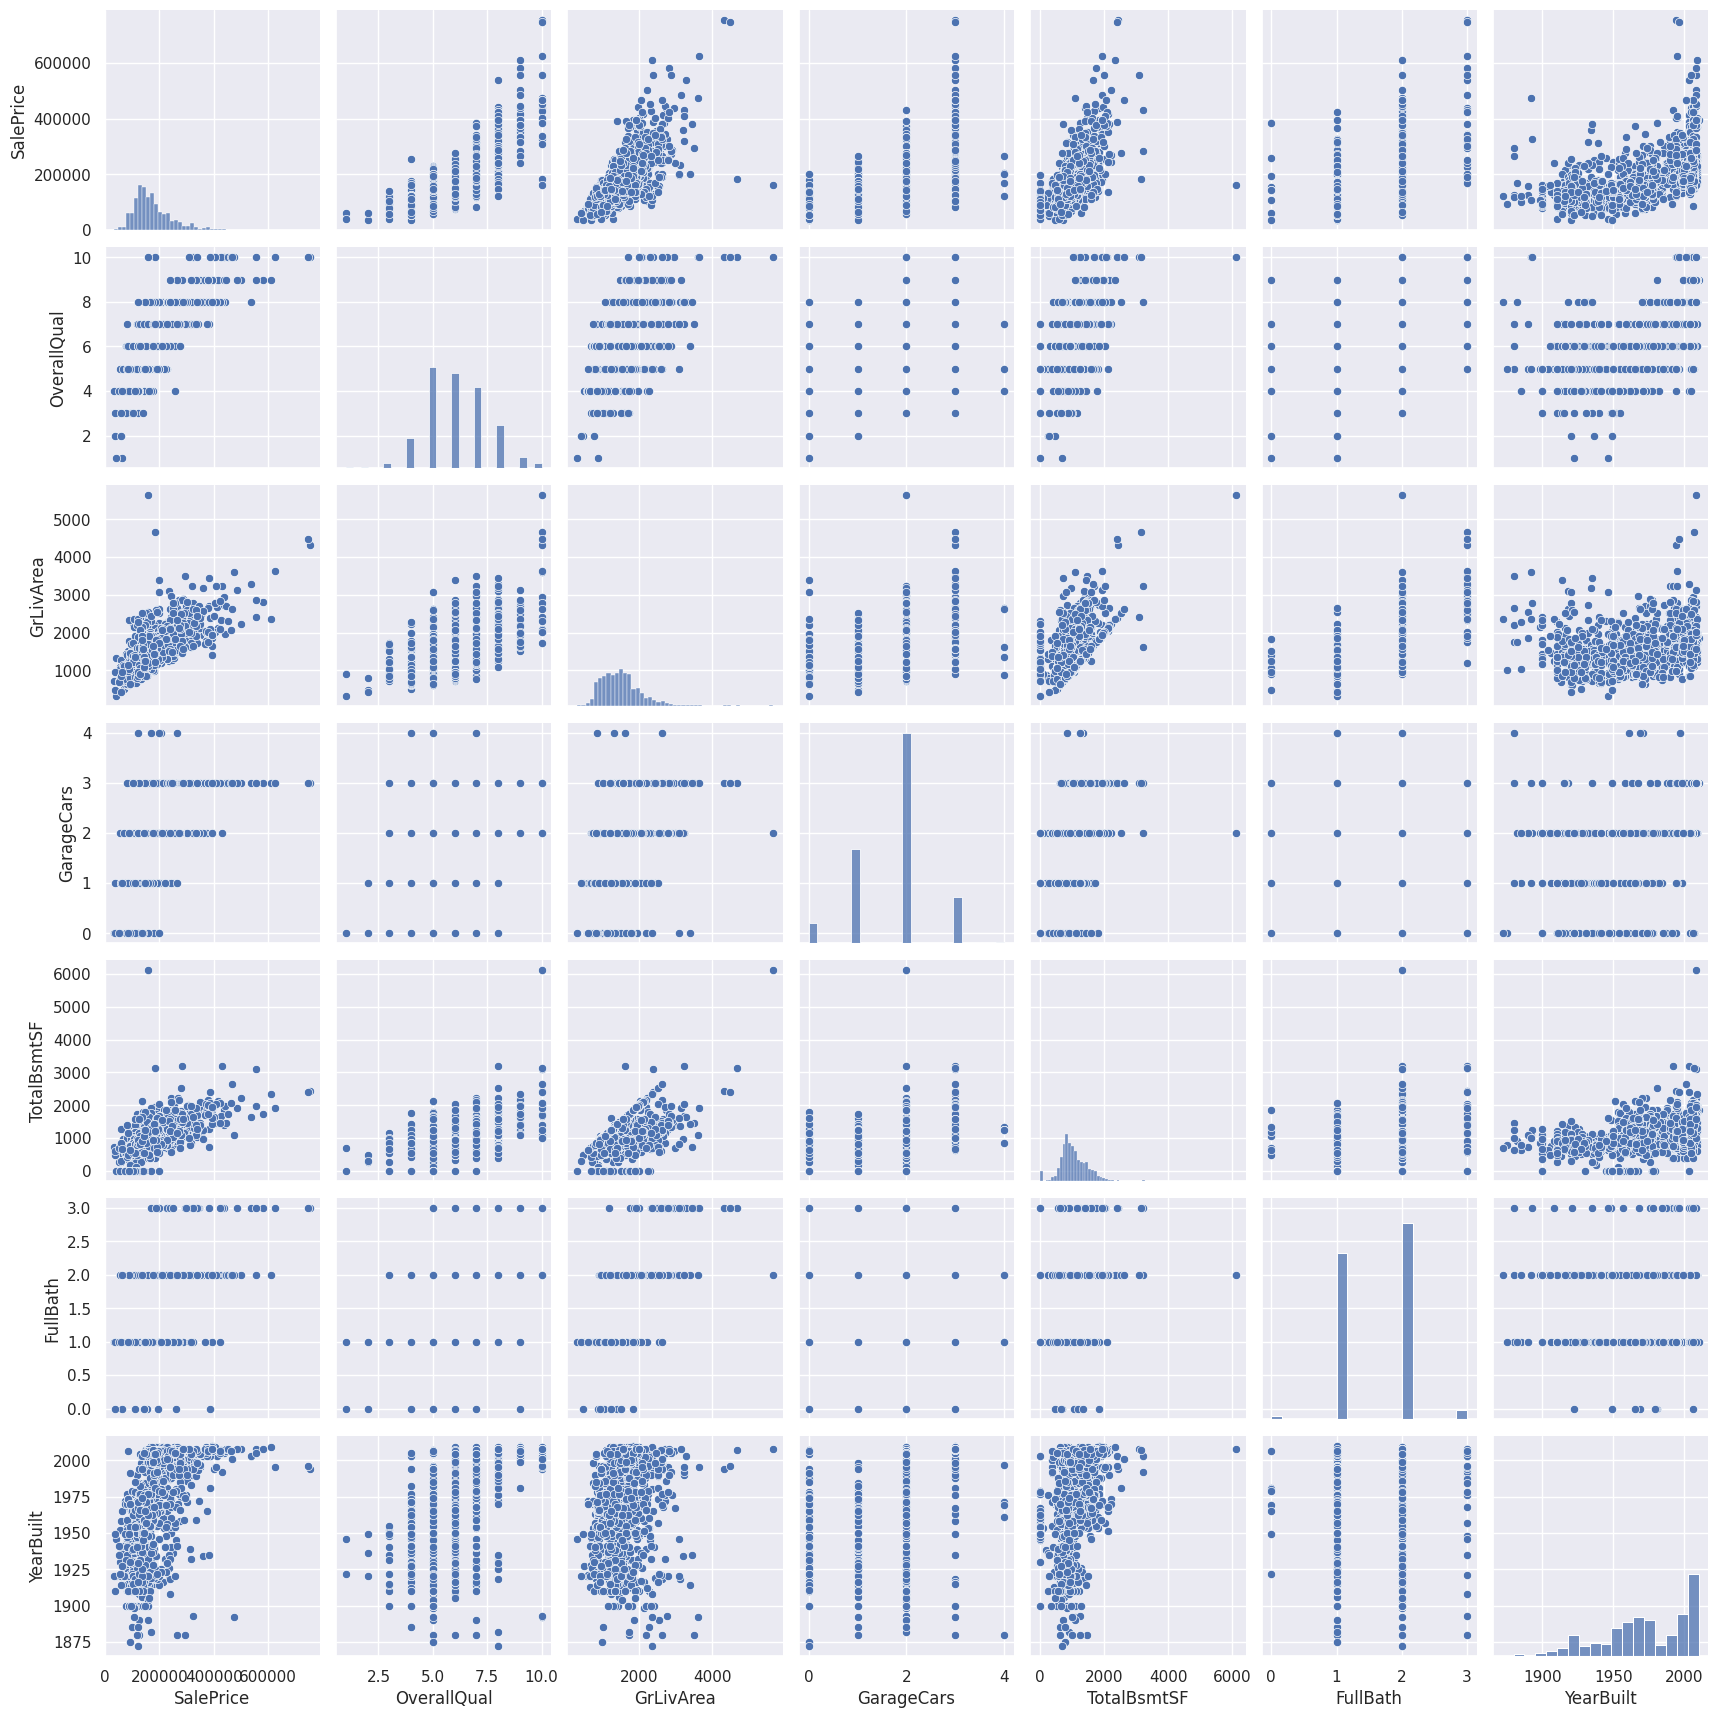

In [136]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(numeric_cols[cols], size = 2.5)
plt.show();

##Identify and Remove Columns with Missing Data
Questions to ask: What columns have missing data and how to find them.  How prevalent is missing data, is there a pattern or random.

In [137]:
#Make a list of missing columns
missing_columns = df.columns[df.isnull().any()].tolist()
print( 'missing columns',  len( missing_columns  ), ':' ,  missing_columns)

missing columns 19 : ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [138]:
#Calculate for percentages of missing data per column.  This will help determine what columns to remove.
total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [139]:
#Based from what we see above.  We'll make a list of columns we want to remove.  These are columns that have more than 1 row of missing data
# 15% of missing data is also a good rule to follow.
missing_data_shortened = missing_data[missing_data['Total'] > 1]
print(missing_data_shortened)

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageQual       81  0.055479
GarageFinish     81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtCond         37  0.025342
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479


In [140]:
#Eyeball your data, eyeball it early and eyeball it often. - John Lamping
missing_data_shortened.index.tolist()

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'LotFrontage',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'GarageYrBlt',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtCond',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrArea']

In [141]:
#created a function to drop data, then drop the data.
def drop_missing_columns(column_names, df):

  for column in column_names.index.tolist():
    df.drop(column, axis=1, inplace=True)

  return df

In [142]:
df_nonulls = drop_missing_columns( missing_data_shortened, df)
df_nonulls.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Outliers and Probabilites